In [1]:
import pandas as pd

In [2]:
# load pre-processed dataset
df = pd.read_csv('../datasets/pre_processed_dataset.csv')
df.sample(3)

,quantity_sold_kg,unit_selling_price_rmb/kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_basil,item_name_bell pepper,item_name_big broccoli,item_name_black chicken fir bacteria,item_name_black rapeseed,...,item_name_yuganjiao,item_name_yuxingcao,item_name_yuxingcao,item_name_zhimaxiancai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum
128,0.35,18.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3317,0.30,12.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
147,0.30,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [3]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
# define dependent and target variables
y = df['quantity_sold_kg']
x = df.drop(columns=['quantity_sold_kg'], axis=1)

# split the dataset 4 : 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

"""use float32 data type for numerical values to reduce memory usage and improve performance"""

# convert to tensor arrays for efficient computation
x_train_tensor = tf.constant(x_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)

x_train_tensor.shape, x_test.shape

2024-04-05 16:21:35.738337: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-04-05 16:21:35.738356: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-04-05 16:21:35.738359: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-04-05 16:21:35.738625: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-05 16:21:35.738635: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(TensorShape([3959, 110]), (990, 110))

In [5]:
# save testing dataset for future use
df_test = pd.concat([y_test.reset_index(drop=True), x_test.reset_index(drop=True)], axis=1)
df_test.to_csv('../datasets/testing_dataset.csv')
df_test.sample(3)

,quantity_sold_kg,unit_selling_price_rmb/kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_basil,item_name_bell pepper,item_name_big broccoli,item_name_black chicken fir bacteria,item_name_black rapeseed,...,item_name_yuganjiao,item_name_yuxingcao,item_name_yuxingcao,item_name_zhimaxiancai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum
188,0.318182,12.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
321,0.300000,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
988,0.271429,19.8,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [6]:
# convert to tensor arrays for efficient computation
x_test_tensor = tf.constant(x_test, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.float32)

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
# decision tree regressor model
dtr_model = DecisionTreeRegressor()
dtr_model.fit(x_train, y_train)
pred = dtr_model.predict(x_test)

In [9]:
from sklearn.metrics import mean_absolute_error

In [10]:
# training set
train_pred = dtr_model.predict(x_train)
train_error = mean_absolute_error(y_train, train_pred)

# testing set
test_pred = dtr_model.predict(x_test)
test_error = mean_absolute_error(y_test, test_pred)

print(f'Training MAE: {train_error}')
print(f'Testing MAE: {test_error}')

Training Error: 0.04824124611459775
Testing Error: 0.05779890916941533


In [11]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

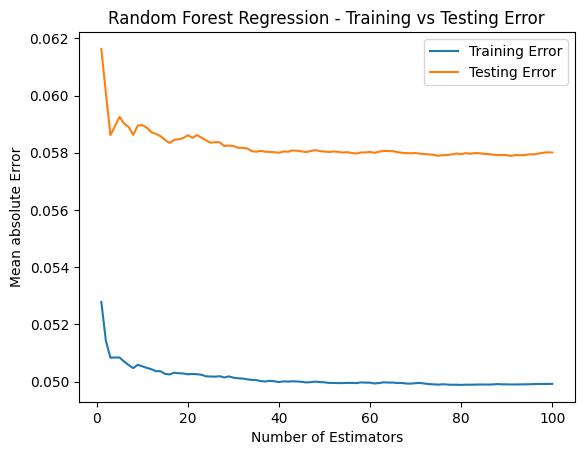

In [12]:
train_errors = []
test_errors = []

# random forest regressor model
for i in range(1, 101):
    rf_model = RandomForestRegressor(n_estimators=i, random_state=42)
    rf_model.fit(x_train, y_train)
    
    # training set
    train_pred = rf_model.predict(x_train)
    train_error = mean_absolute_error(y_train, train_pred)
    train_errors.append(train_error)

    # testing set
    test_pred = rf_model.predict(x_test)
    test_error = mean_absolute_error(y_test, test_pred)
    test_errors.append(test_error)

# plotting the results
plt.plot(range(1, 101), train_errors, label='Training Error')
plt.plot(range(1, 101), test_errors, label='Testing Error')
plt.title('Random Forest Regression - Training vs Testing Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean absolute Error')
plt.legend(loc='upper right')

In [13]:
# LSTM model
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.Dense(x_train_tensor.shape[1]))
lstm_model.add(tf.keras.layers.Reshape((1, x_train_tensor.shape[1]))) 
lstm_model.add(tf.keras.layers.LSTM(128, return_sequences=True))
lstm_model.add(tf.keras.layers.Dense(64, activation='tanh'))
lstm_model.add(tf.keras.layers.Reshape((1, 64))) 
lstm_model.add(tf.keras.layers.LSTM(16))
lstm_model.add(tf.keras.layers.Dense(4, activation='tanh'))
lstm_model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile model
lstm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mae', metrics=['mae'])

epoch_number = 50

# train model and save history
history = lstm_model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_test, y_test))

Epoch 1/50


2024-04-05 16:22:44.873008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.3817 - mae: 0.3817 - val_loss: 0.2488 - val_mae: 0.2488
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.2316 - mae: 0.2316 - val_loss: 0.1845 - val_mae: 0.1845
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1704 - mae: 0.1704 - val_loss: 0.1348 - val_mae: 0.1347
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1340 - mae: 0.1340 - val_loss: 0.1116 - val_mae: 0.1116
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1096 - mae: 0.1096 - val_loss: 0.0963 - val_mae: 0.0963
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0953 - mae: 0.0953 - val_loss: 0.0867 - val_mae: 0.0866
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0796 - mae: 0.0796 - val_loss: 0.0764 - val_mae: 0.0763
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0737 - mae: 0.0737 - val_loss: 0.0749 - val_mae: 0.0749
Epoch 9/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss

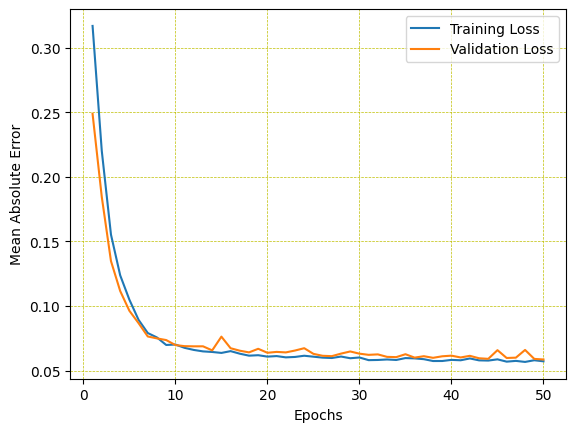

In [14]:
# plot MAE with respect to epoch number
x_range = range(1, epoch_number + 1)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(x_range, loss, label='Training Loss')
plt.plot(x_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.grid(True, linewidth = 0.5, color = 'y', linestyle = '--')

In [15]:
# selected model
final_model = tf.keras.Sequential()
final_model.add(tf.keras.layers.Dense(x_train_tensor.shape[1]))
final_model.add(tf.keras.layers.Reshape((1, x_train_tensor.shape[1]))) 
final_model.add(tf.keras.layers.LSTM(128, return_sequences=True))
final_model.add(tf.keras.layers.Dense(64, activation='tanh'))
final_model.add(tf.keras.layers.Reshape((1, 64))) 
final_model.add(tf.keras.layers.LSTM(16))
final_model.add(tf.keras.layers.Dense(4, activation='tanh'))
final_model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile model
final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mae', metrics=['mae'])

epoch_number = 30

# train model and get history
history = final_model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_test, y_test))

Epoch 1/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.3764 - mae: 0.3764 - val_loss: 0.2564 - val_mae: 0.2564
Epoch 2/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2456 - mae: 0.2456 - val_loss: 0.1902 - val_mae: 0.1902
Epoch 3/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1788 - mae: 0.1788 - val_loss: 0.1375 - val_mae: 0.1375
Epoch 4/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1301 - mae: 0.1301 - val_loss: 0.1166 - val_mae: 0.1166
Epoch 5/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1082 - mae: 0.1082 - val_loss: 0.0951 - val_mae: 0.0951
Epoch 6/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0886 - mae: 0.0886 - val_loss: 0.0823 - val_mae: 0.0822
Epoch 7/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0768 - mae: 0.0768 - val_loss: 0.0772 - val_mae: 0.0771
Epoch 8/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0750 - mae: 0.0750 - val_loss: 0.0741 - val_mae: 0.0740
Epoch 9/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/

In [16]:
final_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 110)            │        12,210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 1, 110)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 128)         │       122,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1, 64)          │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 16)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 444,275 (1.69 MB)

 Trainable params: 148,091 (578.48 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 296,184 (1.13 MB)

In [19]:
# evaluate model
final_model.evaluate(x_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0624 - mae: 0.0624


[0.06077614426612854, 0.06076652929186821]

In [22]:
# predict sample value set
y_predictions = final_model.predict(x_test)
y_predictions[:10]

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.56980956],
       [0.36546203],
       [0.2688634 ],
       [0.44863084],
       [0.18637936],
       [0.2249833 ],
       [0.2330918 ],
       [0.2610339 ],
       [0.39418414],
       [1.0023183 ]], dtype=float32)

In [23]:
# view actual values
y_test[:10]

230     0.750000
4597    0.350000
1954    0.280000
3916    0.900000
1844    0.316667
3091    0.166667
1732    0.100000
859     0.100000
4672    0.440000
4443    1.000000
Name: quantity_sold_kg, dtype: float64

In [35]:
from sklearn.metrics import mean_absolute_error

In [37]:
print('MAE : ', mean_absolute_error(y_test, y_predictions))

MAE 0.060766532284407634


In [24]:
from sklearn.metrics import root_mean_squared_error

In [38]:
print('RMSE : ', root_mean_squared_error(y_test, y_predictions))

RMSE :  0.12804263105195277


In [26]:
from sklearn.metrics import r2_score

In [39]:
print('R2 Score : ', r2_score(y_test, y_predictions))

R2 Score :  0.8660668609971446


Text(0, 0.5, 'Predicted Values')

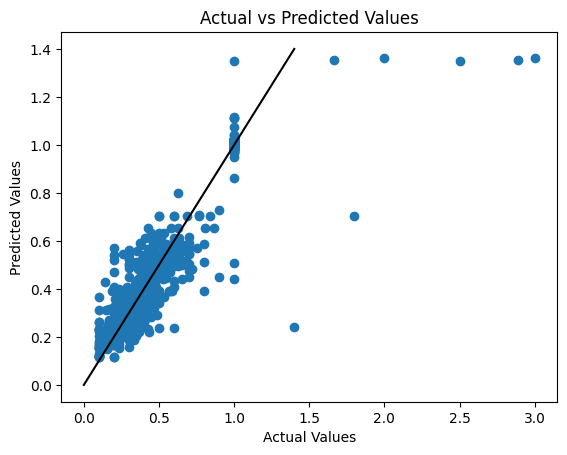

In [34]:
x = [0 , 1.4]
y = x

plt.scatter(y_test_tensor, y_predictions)
plt.plot(x, y, color='black')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [31]:
# save final model
final_model.save('../models/sales_prediction_model.keras')